This is recreation of the original 2016 analysis with additional breakout of per capita statistics.

In [1]:
import os
import pandas
import matplotlib.pyplot as matplot

First see what's in the motherjones dataset.

In [2]:
mj_data = pandas.read_csv('./data/Motherjones Mass Shooting Database 1982-2024.csv')
mj_data.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,"Winder, Georgia",9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,"Fordyce, Arkansas",6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,"Las Vegas, Nevada",12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,"Lewiston, Maine",10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,"Jacksonville, Florida",8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023


Now reduce location data to the state level.

In [3]:
mj_data.location = mj_data.location.apply(lambda x: x.split(',').pop().strip())
mj_data.rename(columns={'location':'state'}, inplace=True)
mj_data.head()

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023


In [4]:
mj_data

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,AR-15,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,12-gauge shotgun,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,-,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,AR-15-style rifle; Glock pistol,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Shopping centers spree killings,Florida,4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.0331886,-80.6429695,Spree,1987
147,United States Postal Service shooting,Oklahoma,8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.6672015,-97.42937037,Mass,1986
148,San Ysidro McDonald's massacre,California,7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.5520013,-117.0430813,Mass,1984
149,Dallas nightclub shooting,Texas,6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984


Confirm all dates are unique, then use that as the index.

In [5]:
len(mj_data.date.unique())

151

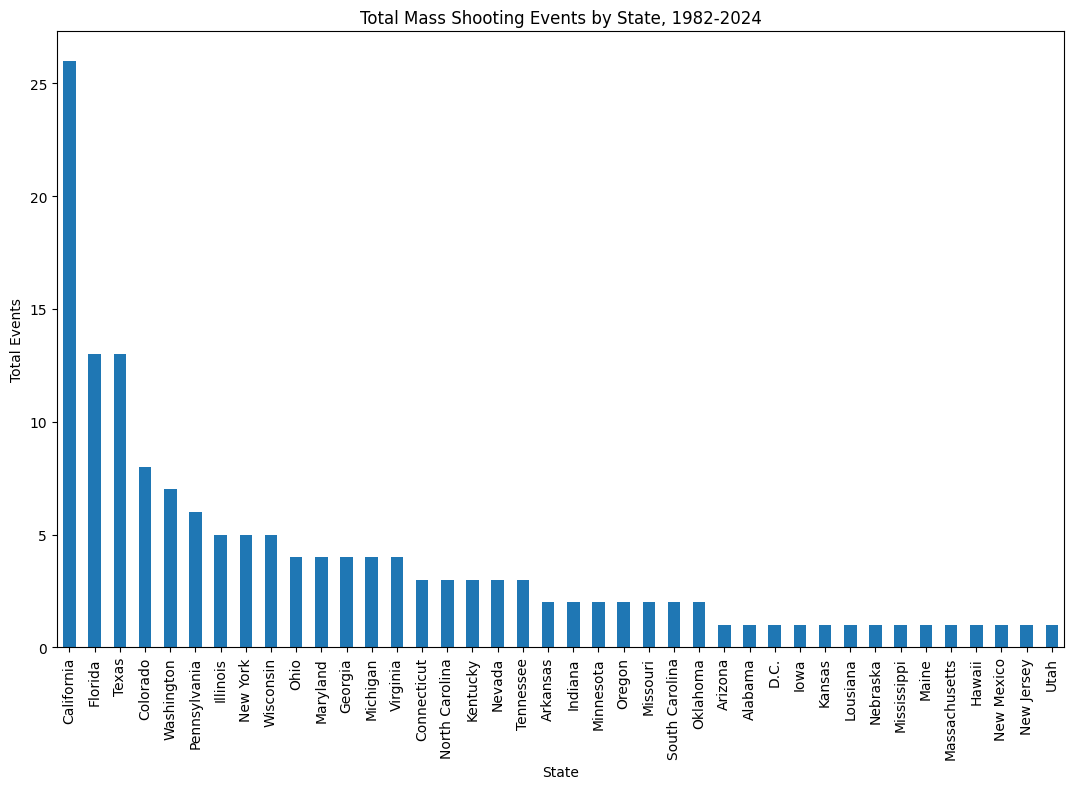

In [6]:
mj_events_per_state = mj_data.groupby('state')['case'].count().sort_values(ascending=False)
mj_events_per_state.plot(kind='bar',title='Total Mass Shooting Events by State, 1982-2024',ylabel='Total Events',xlabel='State',figsize=(13,8))
pass # hide df.plot() output

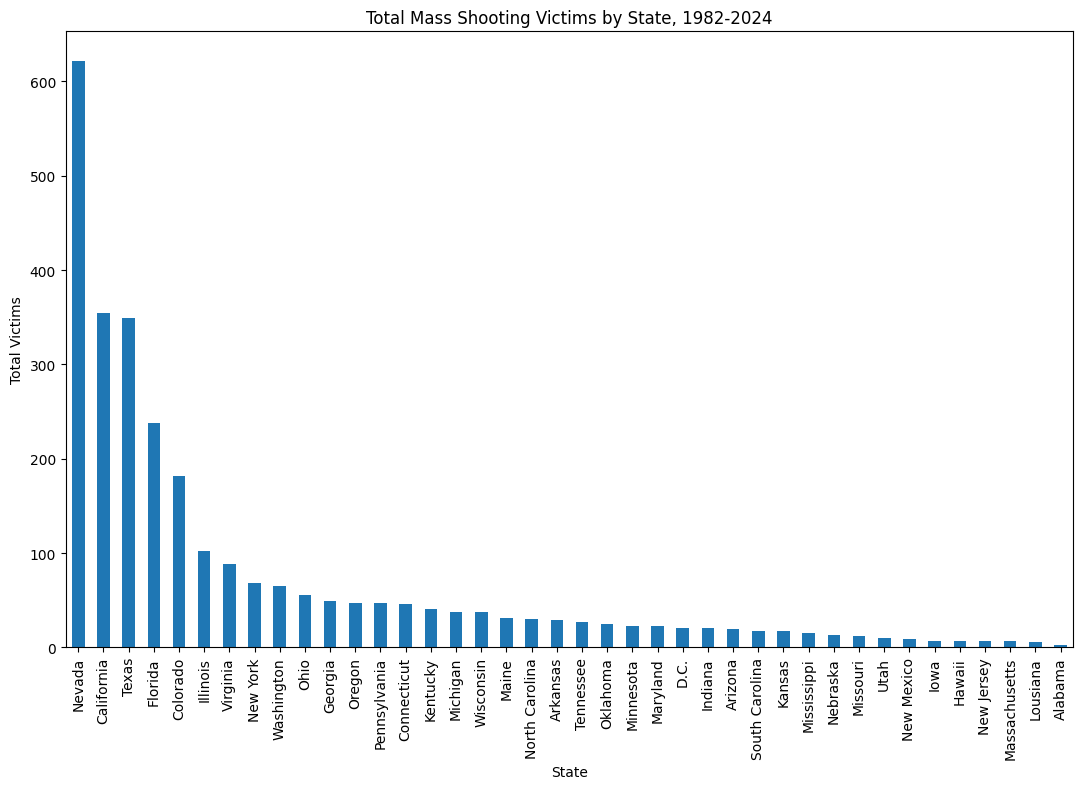

In [7]:
mj_victims_per_state = mj_data.groupby('state')['total_victims'].sum().sort_values(ascending=False)
mj_victims_per_state.plot(kind='bar',title='Total Mass Shooting Victims by State, 1982-2024',ylabel='Total Victims',xlabel='State',figsize=(13,8))
pass

As before, it doesn't say much about the impact of gun laws.

Now to look at population for each state to determine per capita. The strategy is to pull in the census data for 1910-2020, then map that to the events table to determine state population (based on the previous census) at the time of the shooting event.

In [8]:
pop_by_year = pandas.read_csv('./data/Census-Population-Change-Data-1910-2020.csv')
pop_by_year = pop_by_year[pop_by_year['Geography Type'] == 'State'][['Name', 'Year', 'Resident Population']]
pop_by_year.rename(columns={'Name':'state', 'Year':'year', 'Resident Population':'population'}, inplace=True)
pop_by_year.population = pop_by_year.population.apply(lambda x : int(x.replace(',','')))
pop_by_year

,state,year,population
0,Alabama,1910,2138093
1,Alaska,1910,64356
2,Arizona,1910,204354
3,Arkansas,1910,1574449
4,California,1910,2377549
...,...,...,...
674,Virginia,2020,8631393
675,Washington,2020,7705281
676,West Virginia,2020,1793716
677,Wisconsin,2020,5893718


In [9]:
def date_to_year(date:str) -> int:
    year = date.split('/').pop()
    if len(year) < 4: year = '20' + year
    return int(year)

mj_data.year = mj_data.date.apply(date_to_year)
mj_data[['case', 'state', 'year']]

,case,state,year
0,Apalachee High School shooting,Georgia,2024
1,Arkansas grocery store shooting,Arkansas,2024
2,UNLV shooting,Nevada,2023
3,Maine bowling alley and bar shootings,Maine,2023
4,Jacksonville Dollar General store shooting,Florida,2023
...,...,...,...
146,Shopping centers spree killings,Florida,1987
147,United States Postal Service shooting,Oklahoma,1986
148,San Ysidro McDonald's massacre,California,1984
149,Dallas nightclub shooting,Texas,1984


In [10]:
mj_data['state_population'] = pandas.Series(dtype='int64')
for i, row in mj_data.iterrows():
    try: pop = pop_by_year[(pop_by_year.state == row.state) & (pop_by_year.year == (row.year // 10) * 10)].population.values[0]
    except: continue
    mj_data.at[i, 'state_population'] = pop

mj_data.head()

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,state_population
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,White,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024,10711908.0
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,White,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024,3011524.0
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,White,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023,3104614.0
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023,1362359.0
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,White,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023,21538187.0


In [11]:
mj_data['victims_per_capita'] = mj_data.total_victims / mj_data.state_population
mj_data.victims_per_capita

0      1.213603e-06
1      4.648809e-06
2      1.288405e-06
3      2.275465e-05
4      1.392875e-07
           ...     
146    2.052056e-06
147    6.941483e-06
148    1.732304e-06
149    4.919465e-07
150    1.128631e-06
Name: victims_per_capita, Length: 151, dtype: float64

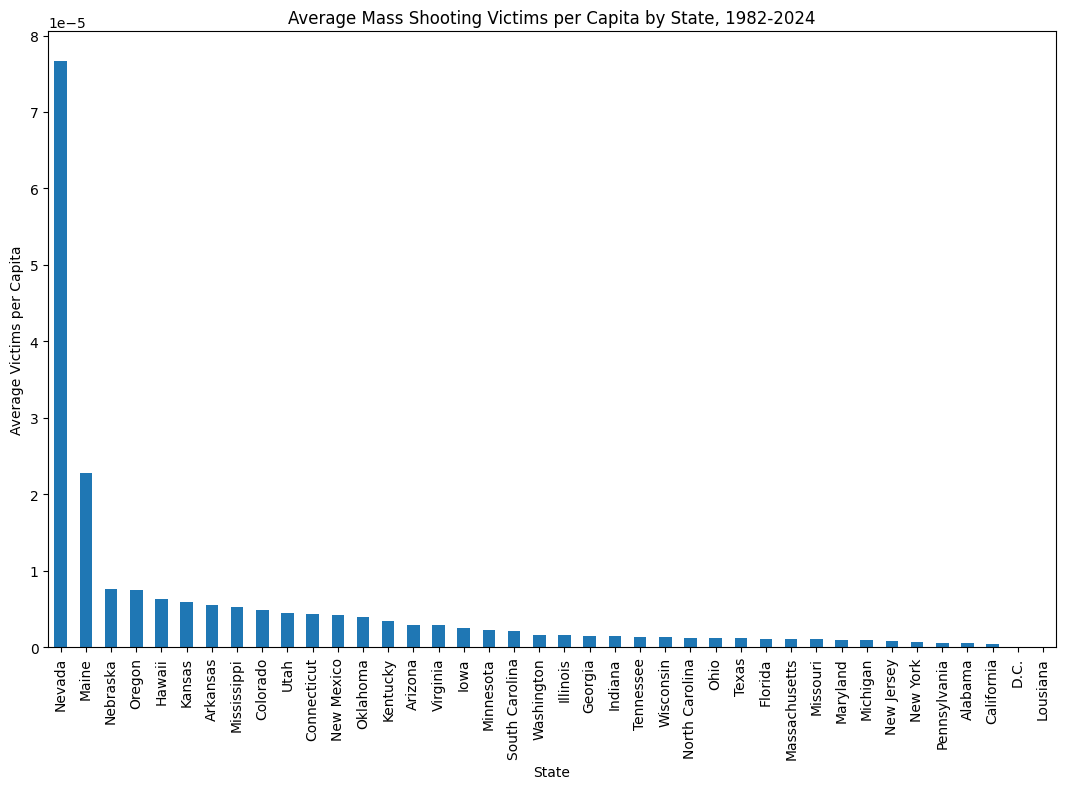

In [21]:
mj_victims_per_state = mj_data.groupby('state').victims_per_capita.mean().sort_values(ascending=False)
mj_victims_per_state.plot(kind='bar',title='Average Mass Shooting Victims per Capita by State, 1982-2024',ylabel='Average Victims per Capita',xlabel='State',figsize=(13,8))
pass

That presents a slightly different view to before. 

Before looking at the 2016 laws for each state, let's split the data into pre- and post-2016 to see what that distribution looks like.

In [13]:
pre_2016_data = mj_data[mj_data.year < 2016]
pre_2016_data

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,state_population,victims_per_capita
73,San Bernardino mass shooting,California,12/2/2015,Syed Rizwan Farook left a Christmas party held...,14,21,35,\nWorkplace,28,Unclear,...,Male & Female,http://www.motherjones.com/mojo/2015/12/san-be...,-,http://www.motherjones.com/mojo/2015/12/san-be...,34.075961,-117.27789,Mass,2015,37253956.0,9.394975e-07
74,Planned Parenthood clinic,Colorado,11/27/2015,"Robert Lewis Dear, 57, shot and killed a polic...",3,9,12,Workplace,57,Unclear,...,M,http://www.nytimes.com/2015/11/28/us/colorado-...,-,http://www.nytimes.com/2015/11/28/us/colorado-...,38.881031,-104.849057,Mass,2015,5029196.0,2.386067e-06
75,Colorado Springs shooting rampage,Colorado,10/31/2015,"Noah Harpham, 33, shot three people before dea...",3,0,3,Other,33,Unclear,...,M,http://www.motherjones.com/mojo/2015/11/open-c...,-,http://www.motherjones.com/mojo/2015/11/open-c...,38.83755,-104.814251,Mass,2015,5029196.0,5.965168e-07
76,Umpqua Community College shooting,Oregon,10/1/2015,26-year-old Chris Harper Mercer opened fire at...,9,9,18,School,26,Unclear,...,Male,http://www.nytimes.com/2015/10/03/us/chris-har...,http://www.latimes.com/nation/nationnow/la-na-...,http://www.nytimes.com/2015/10/03/us/chris-har...,43.289538,-123.333193,Mass,2015,3831074.0,4.698421e-06
77,Chattanooga military recruitment center,Tennessee,7/16/2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,24,Unclear,...,Male,http://www.reuters.com/article/2015/07/16/us-u...,-,http://www.reuters.com/article/2015/07/16/us-u...,35.047157,-85.311819,Mass,2015,6346105.0,1.103039e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Shopping centers spree killings,Florida,4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.0331886,-80.6429695,Spree,1987,9746324.0,2.052056e-06
147,United States Postal Service shooting,Oklahoma,8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.6672015,-97.42937037,Mass,1986,3025290.0,6.941483e-06
148,San Ysidro McDonald's massacre,California,7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.5520013,-117.0430813,Mass,1984,23667902.0,1.732304e-06
149,Dallas nightclub shooting,Texas,6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984,14229191.0,4.919465e-07


In [14]:
post_2016_data = mj_data[mj_data.year >= 2016]
post_2016_data

,case,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,state_population,victims_per_capita
0,Apalachee High School shooting,Georgia,9/4/24,"Colt Gray, 14, was apprehended by responding p...",4,9,13,School,14,yes,...,M,https://www.nbcnews.com/news/us-news/suspect-c...,https://www.washingtonpost.com/nation/2024/09/...,-,-,-,mass,2024,10711908.0,1.213603e-06
1,Arkansas grocery store shooting,Arkansas,6/21/24,"Travis Posey, 44, opened fire in the parking l...",4,10,14,workplace,44,-,...,M,https://apnews.com/article/shooting-fordyce-ma...,-,-,-,-,mass,2024,3011524.0,4.648809e-06
2,UNLV shooting,Nevada,12/6/23,"Anthony Polito, 67, a former university profes...",3,1,4,School,67,-,...,M,https://www.nbcnews.com/news/us-news/anthony-p...,-,-,-,-,mass,2023,3104614.0,1.288405e-06
3,Maine bowling alley and bar shootings,Maine,10/25/23,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,yes,...,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023,1362359.0,2.275465e-05
4,Jacksonville Dollar General store shooting,Florida,8/26/23,"Ryan Palmeter, 21, outfitted in body armor, fa...",3,0,3,workplace,21,yes,...,M,https://www.washingtonpost.com/nation/2023/08/...,https://www.nbcnews.com/news/us-news/live-blog...,-,-,-,mass,2023,21538187.0,1.392875e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Baton Rouge police shooting,Lousiana,7/17/2016,"Gavin Long, 29, a former Marine who served in ...",3,3,6,Other,29,Yes,...,M,http://time.com/4411027/baton-rouge-shooter-ga...,-,http://time.com/4411027/baton-rouge-shooter-ga...,30.433601,-91.081403,Spree,2016,NaN,NaN
69,Dallas police shooting,Texas,7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,25,Unclear,...,M,http://www.nytimes.com/2016/07/11/us/dallas-sh...,-,http://www.nytimes.com/2016/07/11/us/dallas-sh...,32.7801052,-96.8000082,Mass,2016,25145561.0,6.362952e-07
70,Orlando nightclub massacre,Florida,6/12/2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,29,Unclear,...,M,http://www.motherjones.com/politics/2016/06/as...,-,http://www.motherjones.com/politics/2016/06/as...,28.519718,-81.376777,Mass,2016,18801310.0,5.425154e-06
71,Excel Industries mass shooting,Kansas,2/25/2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,38,Unclear,...,M,http://www.nytimes.com/2016/02/26/us/shooting-...,-,http://www.nytimes.com/2016/02/26/us/shooting-...,38.135992,-97.425145,Mass,2016,2853118.0,5.958394e-06


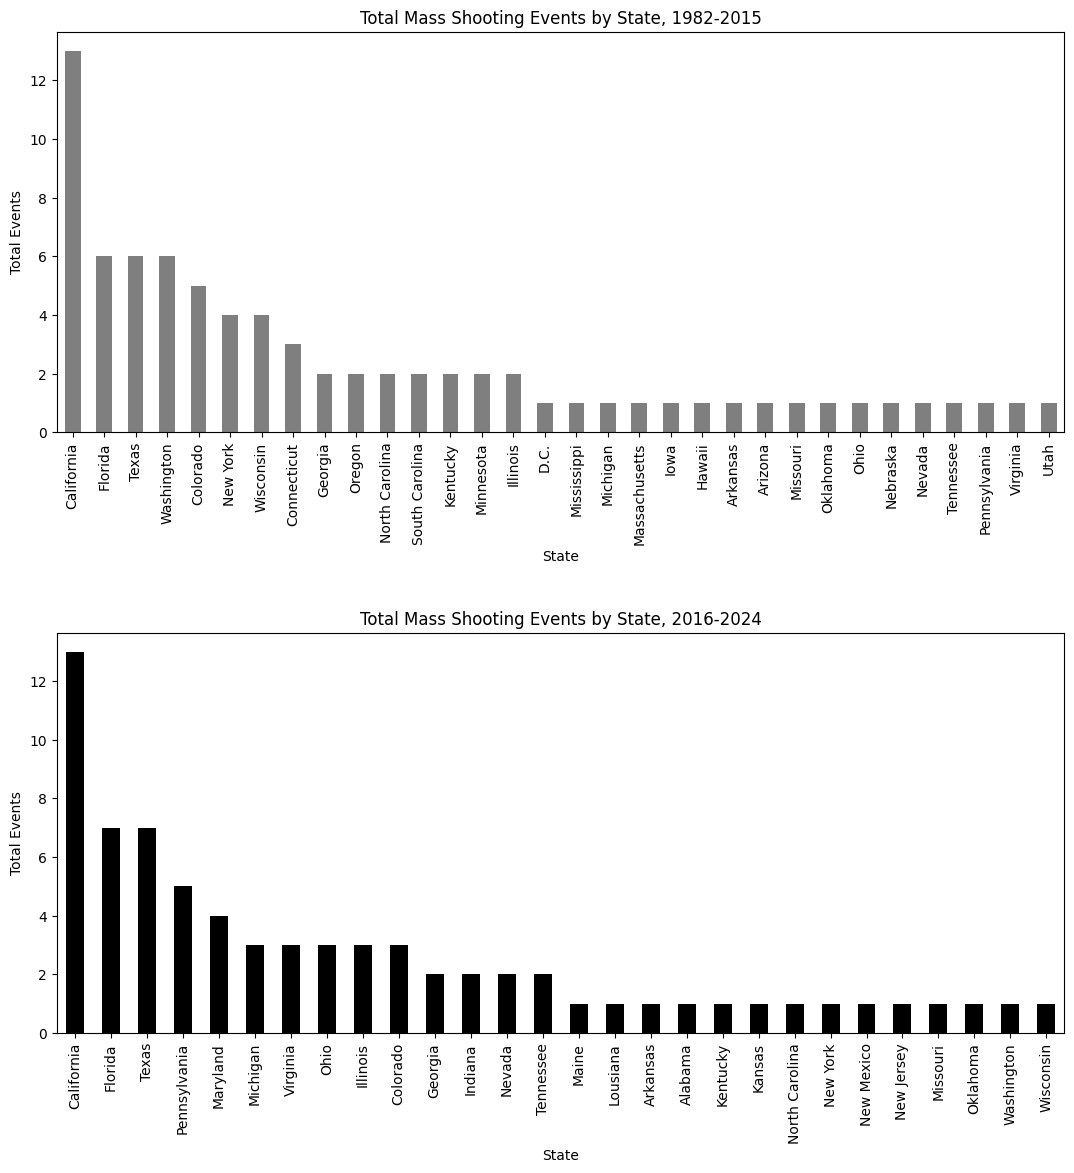

In [17]:
fig, axes = matplot.subplots(2, 1, figsize=(13, 13), sharey=True)
matplot.subplots_adjust(hspace=0.5)
pre_2016_data.groupby('state').case.count().sort_values(ascending=False).plot(ax=axes[0], title='Total Mass Shooting Events by State, 1982-2015',ylabel='Total Events',xlabel='State',kind='bar',color='C7')
post_2016_data.groupby('state').case.count().sort_values(ascending=False).plot(ax=axes[1], title='Total Mass Shooting Events by State, 2016-2024',ylabel='Total Events',xlabel='State',kind='bar',color='k')
pass

There is a lot that could be said, but what stands out the most to me is the fact there were roughly the same number of events in the 33 years leading up to 2016 as the 8 years that followed.

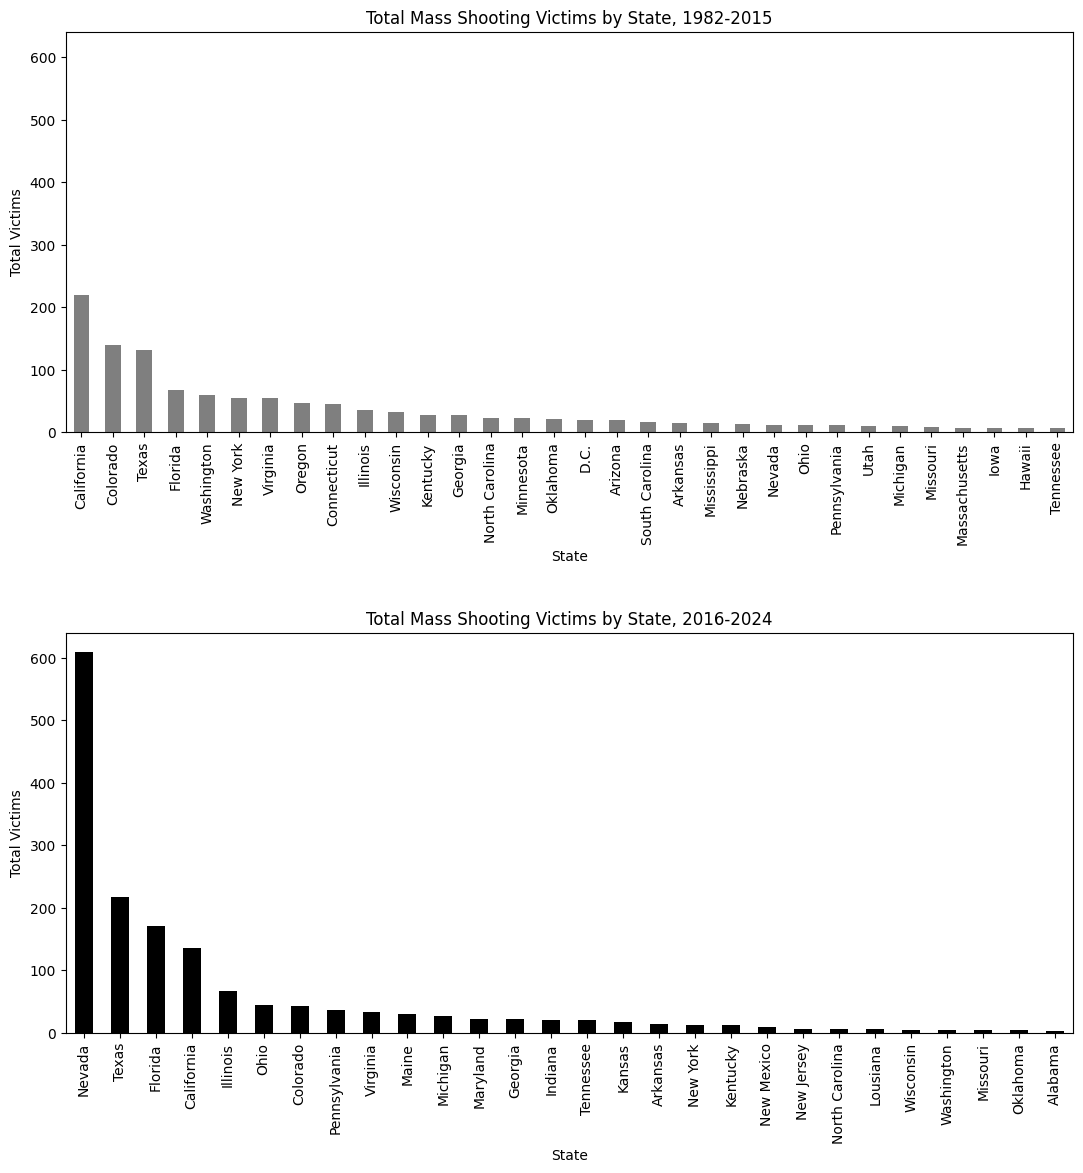

In [19]:
fig, axes = matplot.subplots(2, 1, figsize=(13, 13), sharey=True)
matplot.subplots_adjust(hspace=0.5)
pre_2016_data.groupby('state').total_victims.sum().sort_values(ascending=False).plot(ax=axes[0], title='Total Mass Shooting Victims by State, 1982-2015',ylabel='Total Victims',xlabel='State',kind='bar',color='C7')
post_2016_data.groupby('state').total_victims.sum().sort_values(ascending=False).plot(ax=axes[1], title='Total Mass Shooting Victims by State, 2016-2024',ylabel='Total Victims',xlabel='State',kind='bar',color='k')
pass

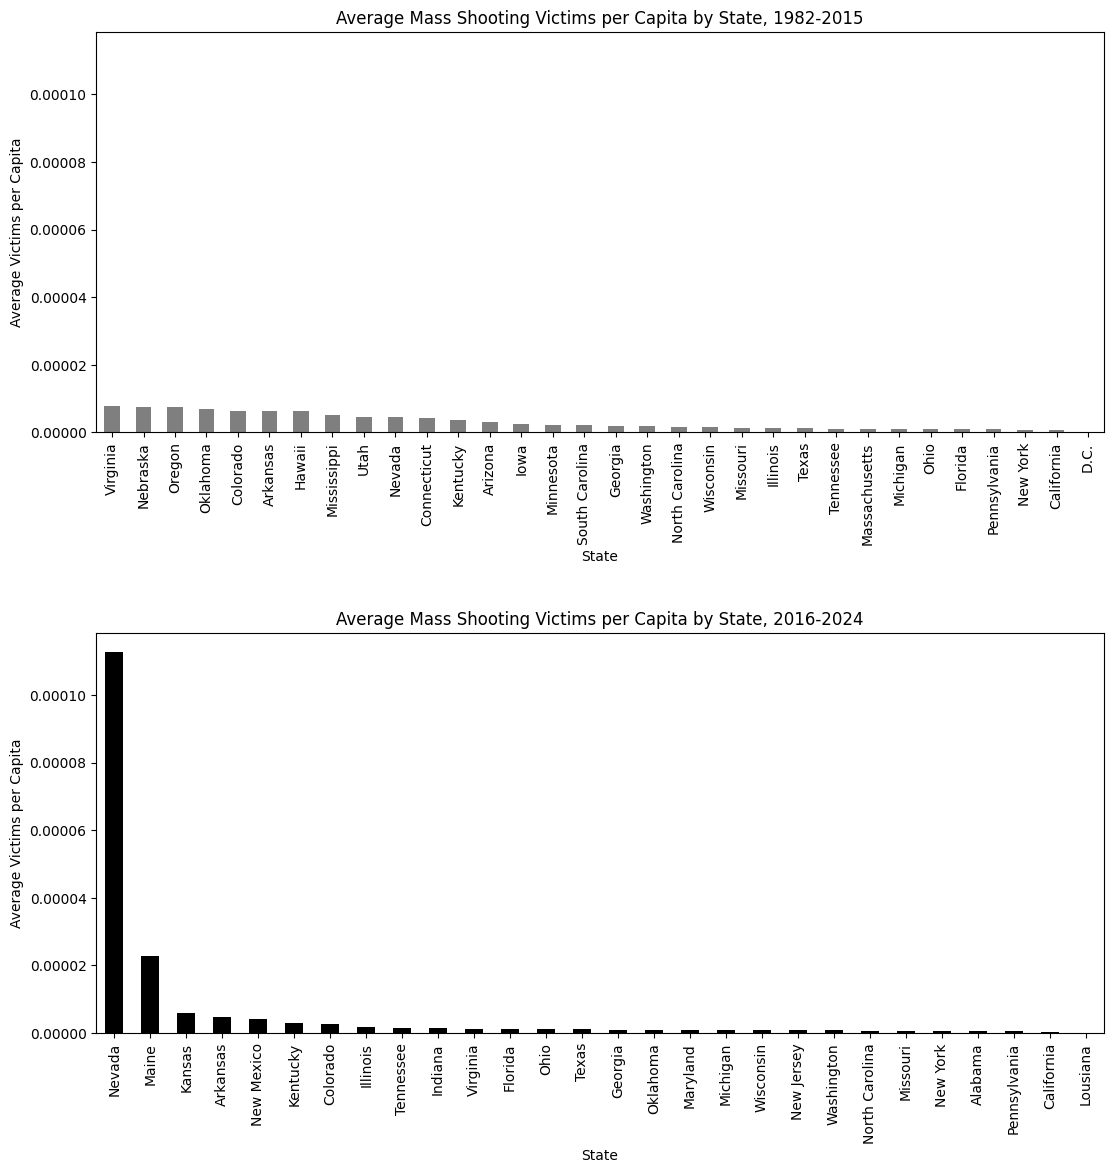

In [22]:
fig, axes = matplot.subplots(2, 1, figsize=(13, 13), sharey=True)
matplot.subplots_adjust(hspace=0.5)
pre_2016_data.groupby('state').victims_per_capita.mean().sort_values(ascending=False).plot(ax=axes[0], title='Average Mass Shooting Victims per Capita by State, 1982-2015',ylabel='Average Victims per Capita',xlabel='State',kind='bar',color='C7')
post_2016_data.groupby('state').victims_per_capita.mean().sort_values(ascending=False).plot(ax=axes[1], title='Average Mass Shooting Victims per Capita by State, 2016-2024',ylabel='Average Victims per Capita',xlabel='State',kind='bar',color='k')
pass